In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D , Dense , Flatten , MaxPool2D , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential


In [5]:
trainPath = r"D:\Work\python\dl_clg\datasets\x_ray\6 Pneumonia_X_Ray\train"
testPath = r"D:\Work\python\dl_clg\datasets\x_ray\6 Pneumonia_X_Ray\test"
data_generator = ImageDataGenerator(rescale=1.0/255)

In [6]:
train_data = data_generator.flow_from_directory(trainPath,
                            target_size=(224, 224),
                            batch_size=32,
                            class_mode='binary'
                            )
test_data = data_generator.flow_from_directory(
    testPath,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2040 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [12]:
model = Sequential([
    Conv2D(64,(3,3) , input_shape=(224,224,3) , activation='relu'),
    MaxPool2D(pool_size=(3,3)),
    
    Conv2D(32,(3,3) , activation='relu'),
    MaxPool2D(pool_size=(3,3)),
    
    Flatten(),
    
    Dense(128 , activation="relu"),
    Dropout(0.3),
    
    Dense(64, activation="relu"),
    
    Dense( 1, activation="sigmoid")
])

In [13]:
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [14]:
history = model.fit(train_data , epochs=5, batch_size=32, validation_data=test_data)

Epoch 1/5
64/64 [==============================] - 51s 613ms/step - loss: 0.3595 - accuracy: 0.8672 - val_loss: 0.8110 - val_accuracy: 0.6653
Epoch 2/5
64/64 [==============================] - 20s 309ms/step - loss: 0.1839 - accuracy: 0.9270 - val_loss: 0.6865 - val_accuracy: 0.7149
Epoch 3/5
64/64 [==============================] - 18s 279ms/step - loss: 0.1154 - accuracy: 0.9544 - val_loss: 1.4105 - val_accuracy: 0.6054
Epoch 4/5
64/64 [==============================] - 17s 263ms/step - loss: 0.0898 - accuracy: 0.9686 - val_loss: 1.5639 - val_accuracy: 0.6260
Epoch 5/5
64/64 [==============================] - 15s 239ms/step - loss: 0.0684 - accuracy: 0.9706 - val_loss: 1.6161 - val_accuracy: 0.6632


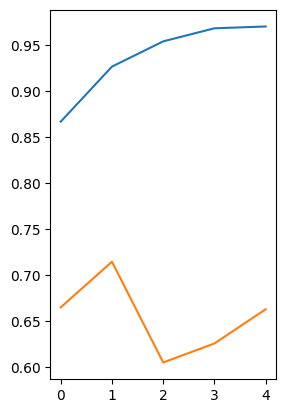

In [15]:
import matplotlib.pyplot as plt

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'] , label='accuracy')
plt.plot(history.history['val_accuracy'] , label='val accuracy')